In [6]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, \
              recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score, \
              auc, mean_squared_error, accuracy_score
import math
plt.rcParams["figure.figsize"] = (12,6)

# matplotlib

## plot

In [32]:
x = np.array([5,25,16,14,8,9,25])

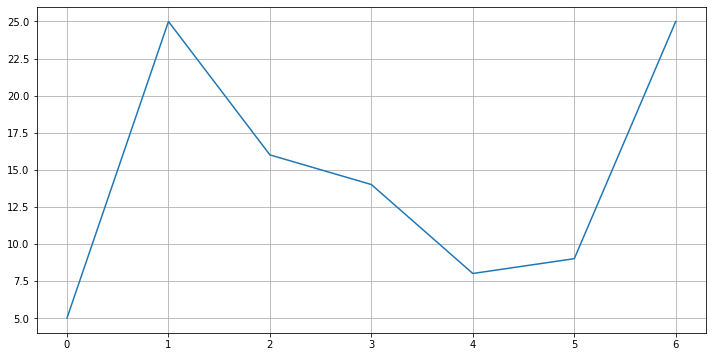

In [33]:
plt.plot(x)
plt.grid()

In [34]:
# Добавить Y

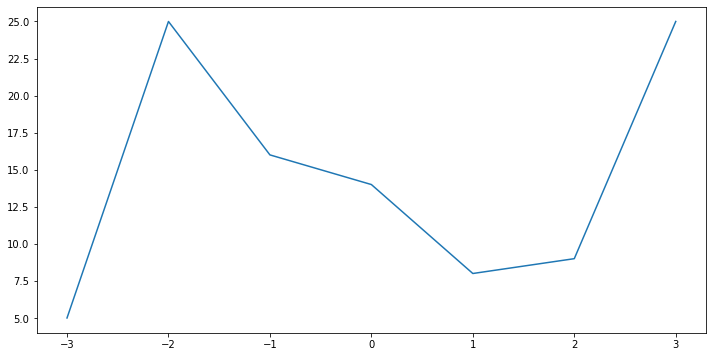

In [5]:
y = np.array([5,25,16,14,8,9,25])
x = np.array([-3,-2,-1,0,1,2,3])
plt.plot(x,y)

In [13]:
y1 = np.array([25,16,14,8,9,5,25])
y = np.array([5,25,16,14,8,9,25])
x = np.array([-3,-2,-1,0,1,2,3])


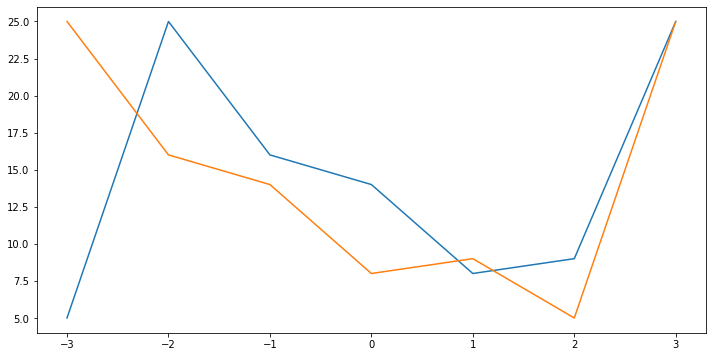

In [14]:
plt.plot(x,y,x,y1)

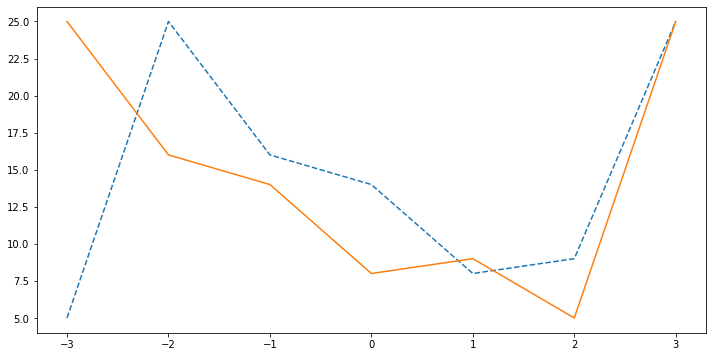

In [15]:
plt.plot(x,y , '--')
plt.plot(x,y1)

In [ ]:
# добавить второй график

In [ ]:
# styles - -- -. :

In [ ]:
# colors b g r c y w k
# color = '#0000CC' (0,1,0, 0.8)
# marker o v ^ < > x 2 3 4 s p * h
#linewidth

In [ ]:
# Практика нарисовать 3 параболы разными стилями

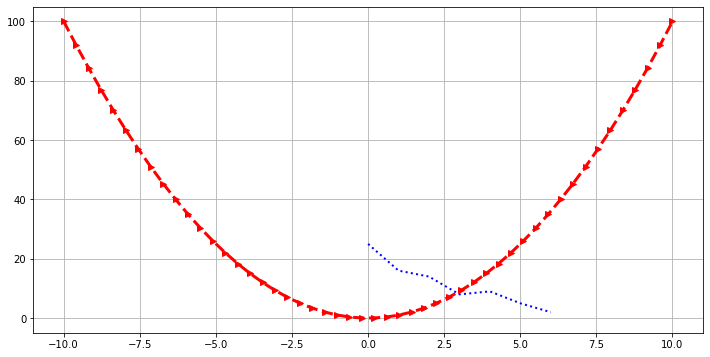

In [23]:
x = np.linspace(-10,10,50)
y = np.linspace(-10,10,50)
n = np.array([25,16,14,8,9,5,2])
for i in range (len(x)):
    y[i]=x[i]*x[i]
plt.plot(x,y, '-->',color=(1,0,0),linewidth = 3)
plt.grid()
plt.plot(n,':',color = (0,0,1),linewidth = 2)

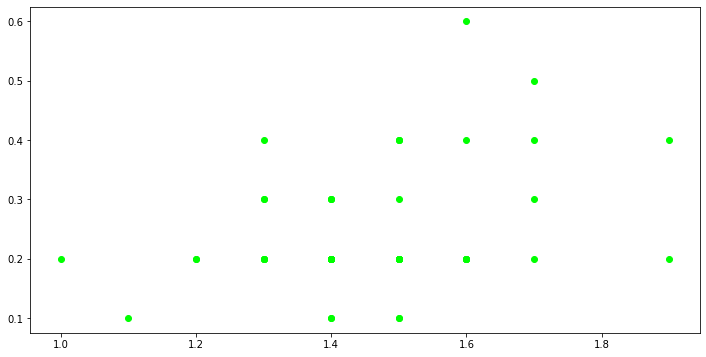

In [38]:
#Нарисуем распределение ирисов scatter

from sklearn import datasets
iris = datasets.load_iris()
X = iris['data']
y = iris['target']

plt.scatter(X[y==0, 2], X[y==0, 3], color = (0,1,0))



In [37]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

## Кривые обучения

In [25]:
from sklearn.model_selection import train_test_split 

In [39]:
# Передаем какую-то модель и полное наше множество.
def plot_lc_cl (model, X, Y):
    X_t, X_v, Y_t, Y_v = train_test_split(X, Y, test_size = 0.2, random_state = 5)
#списки заводим для накопления ошибок (значения метрик accracy) 
    acc_t, acc_v = [], [] 
#    (1, len(X_t)) - это значит мы идем от первого элемента до конца длины нашего множества.
    for m in range(1, len(X_t)):
#        срез это фактически первый элемент и на нем обучаем данные и так по одному идет
        model.fit (X_t[:m], Y_t[:m])
        pred_t = model.predict(X_t[:m])
        pred_v = model.predict(X_v)
        
        
        acc_t.append(accuracy_score(Y_t[:m], pred_t))
        acc_v.append(accuracy_score(Y_v, pred_v))
    plt.plot(acc_t, 'r--^')
    plt.plot(acc_v, 'b-o')
    plt.grid()

In [22]:
# def plot_lc_cl (model, X, Y):


In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
clf = DecisionTreeClassifier(max_depth = 2)

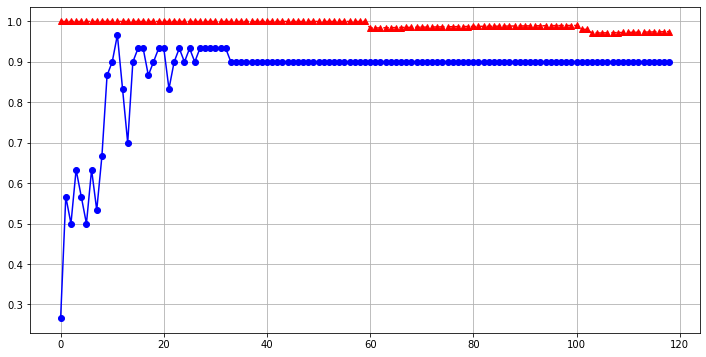

In [42]:
# по оси y откладывается величина точности, по X, количество примеров,по которым учится модель, синяя линия это проверочная ,красная train обучающая
plot_lc_cl(clf, X,y)

In [43]:
# Напишем для регрессии
# сгенерируем данные

X = 6*np.random.rand(100,1) - 3
Y = 0.5*X**2 + X + 2 + np.random.randn(100,1)


In [44]:
# Здесь должна быть функция для построения кривых регрессии

In [45]:
# отличие от классификации, что мы передаем другие метрики (mean_squared_error)
def plot_lc_re (model, X, Y):
    X_t, X_v, Y_t, Y_v = train_test_split(X, Y, test_size = 0.2, random_state = 5)

    acc_t, acc_v = [], [] 

    for m in range(1, len(X_t)):

        model.fit (X_t[:m], Y_t[:m])
        pred_t = model.predict(X_t[:m])
        pred_v = model.predict(X_v)
        
        
        acc_t.append(mean_squared_error(Y_t[:m], pred_t))
        acc_v.append(mean_squared_error(Y_v, pred_v))
    plt.plot(np.sqrt(acc_t), 'r--^')
    plt.plot(np.sqrt(acc_v), 'b-o')
    plt.grid()

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
lr = LinearRegression()

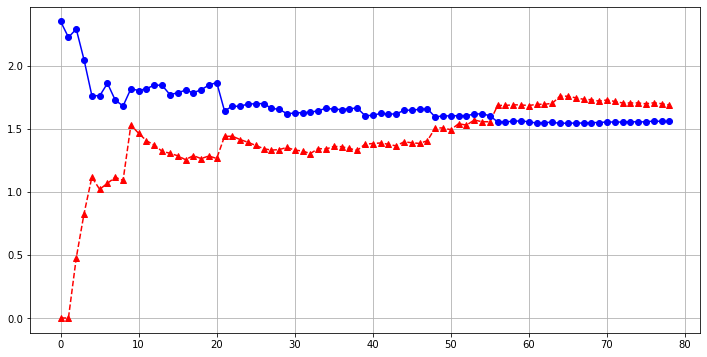

In [48]:
plot_lc_re(lr, X,Y)

In [49]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [50]:
pr = Pipeline([('pol', PolynomialFeatures(degree = 2)),
                ('lr', LinearRegression())])

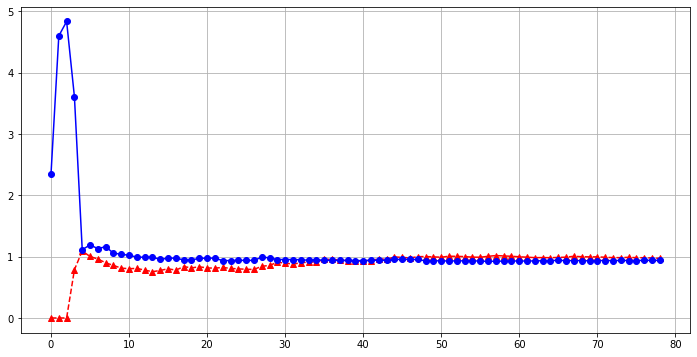

In [51]:
plot_lc_re(pr, X,Y)

In [52]:
pr['lr'].coef_

array([[0.        , 1.03957446, 0.55792869]])

In [53]:
from sklearn.tree import DecisionTreeRegressor

In [54]:
dt =  DecisionTreeRegressor (max_depth = 200)

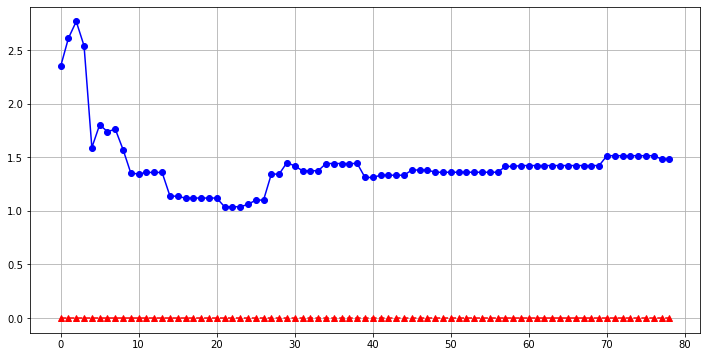

In [55]:
plot_lc_re(dt, X,Y)

## Классификатор с голосованием

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Жесткое голосование
log_clf = LogisticRegression(random_state = 78)
rnd_clf = RandomForestClassifier(random_state = 78)
svm_clf = SVC(random_state = 78)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')

In [3]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])

In [7]:
#формируем кортеж из всех наших классификаторов, потом их перебираем,тренируем их,делаем предсказание на тестовом наборе и печататем
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

VotingClassifier 0.904


In [75]:
# Мягкое голосование,считаются вероятности и потом складываются. НО: ВАЖНО,классификаторы должны уметь выдавать вероятность
#не все классификаторы умеют это делать.
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC(probability=True)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('svc', SVC(probability=True))],
                 voting='soft')

In [87]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
  #  print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

## Бэггинг

In [77]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [85]:
#print(accuracy_score(y_test, y_pred))

In [84]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
#print(accuracy_score(y_test, y_pred_tree))

## Случайный лес

In [80]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

In [83]:
#print(accuracy_score(y_test, y_pred_rf))

In [82]:
#from sklearn.datasets import load_iris
#iris = load_iris()
#rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
#rnd_clf.fit(iris["data"], iris["target"])
#for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
#    print(name, score)

sepal length (cm) 0.11249225099876375
sepal width (cm) 0.02311928828251033
petal length (cm) 0.4410304643639577
petal width (cm) 0.4233579963547682
